In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Anchor project root safely
PROJECT_ROOT = Path.cwd().parent
DATA_PATH = PROJECT_ROOT / "data" / "processed" / "merged_data.csv"

assert DATA_PATH.exists(), "Processed dataset missing. Run 02_data_cleaning first."

print("Loading data from:", DATA_PATH)


Loading data from: f:\Projects\ML\Machine-Learning-From-Scratch\01_Supervised_Learning\Linear_Regression\projects\Inflation_Sensitivity_Engine\data\processed\merged_data.csv


In [4]:
df = pd.read_csv(DATA_PATH, parse_dates=["date"])

df.head()


,date,commodity_price,fuel_price,rainfall_index
0,2015-01-01,124.967142,71.287752,84.543496
1,2015-02-01,243.584499,140.915522,95.263628
2,2015-03-01,370.061384,201.321666,90.292729
3,2015-04-01,505.291682,271.189097,101.637483
4,2015-05-01,622.950149,341.490248,146.293171


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             108 non-null    datetime64[ns]
 1   commodity_price  108 non-null    float64       
 2   fuel_price       108 non-null    float64       
 3   rainfall_index   108 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.5 KB


In [6]:
df.describe()


,date,commodity_price,fuel_price,rainfall_index
count,108,108.000000,108.000000,108.000000
mean,2019-06-16 19:06:40,6471.535495,3828.534902,100.754072
min,2015-01-01 00:00:00,124.967142,71.287752,35.174653
25%,2017-03-24 06:00:00,3281.540011,1944.666505,87.401505
50%,2019-06-16 00:00:00,6431.155605,3818.187750,101.098519
75%,2021-09-08 12:00:00,9649.623941,5717.111150,113.660596
max,2023-12-01 00:00:00,12849.378693,7624.000090,146.293171
std,NaN,3719.668384,2204.935286,19.958645


In [7]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

df.head()


,date,commodity_price,fuel_price,rainfall_index,year,month
0,2015-01-01,124.967142,71.287752,84.543496,2015,1
1,2015-02-01,243.584499,140.915522,95.263628,2015,2
2,2015-03-01,370.061384,201.321666,90.292729,2015,3
3,2015-04-01,505.291682,271.189097,101.637483,2015,4
4,2015-05-01,622.950149,341.490248,146.293171,2015,5


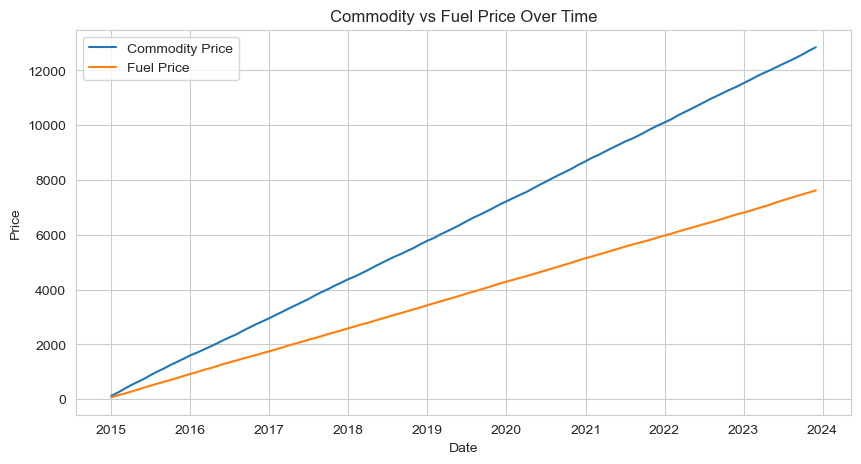

In [8]:
plt.plot(df["date"], df["commodity_price"], label="Commodity Price")
plt.plot(df["date"], df["fuel_price"], label="Fuel Price")

plt.legend()
plt.title("Commodity vs Fuel Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


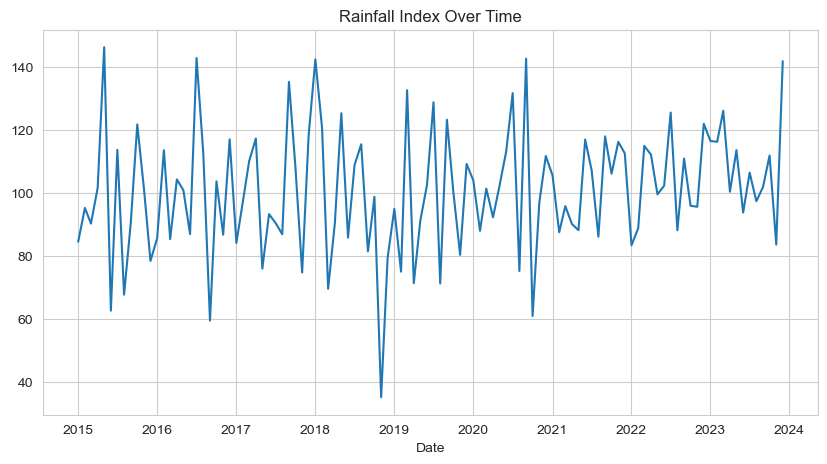

In [9]:
plt.plot(df["date"], df["rainfall_index"])
plt.title("Rainfall Index Over Time")
plt.xlabel("Date")
plt.show()


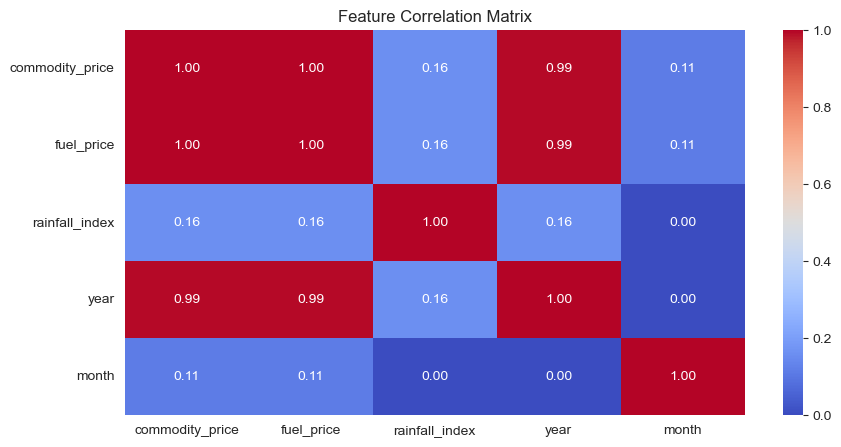

In [10]:
numeric_df = df.select_dtypes(include="number")

corr_matrix = numeric_df.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Feature Correlation Matrix")
plt.show()


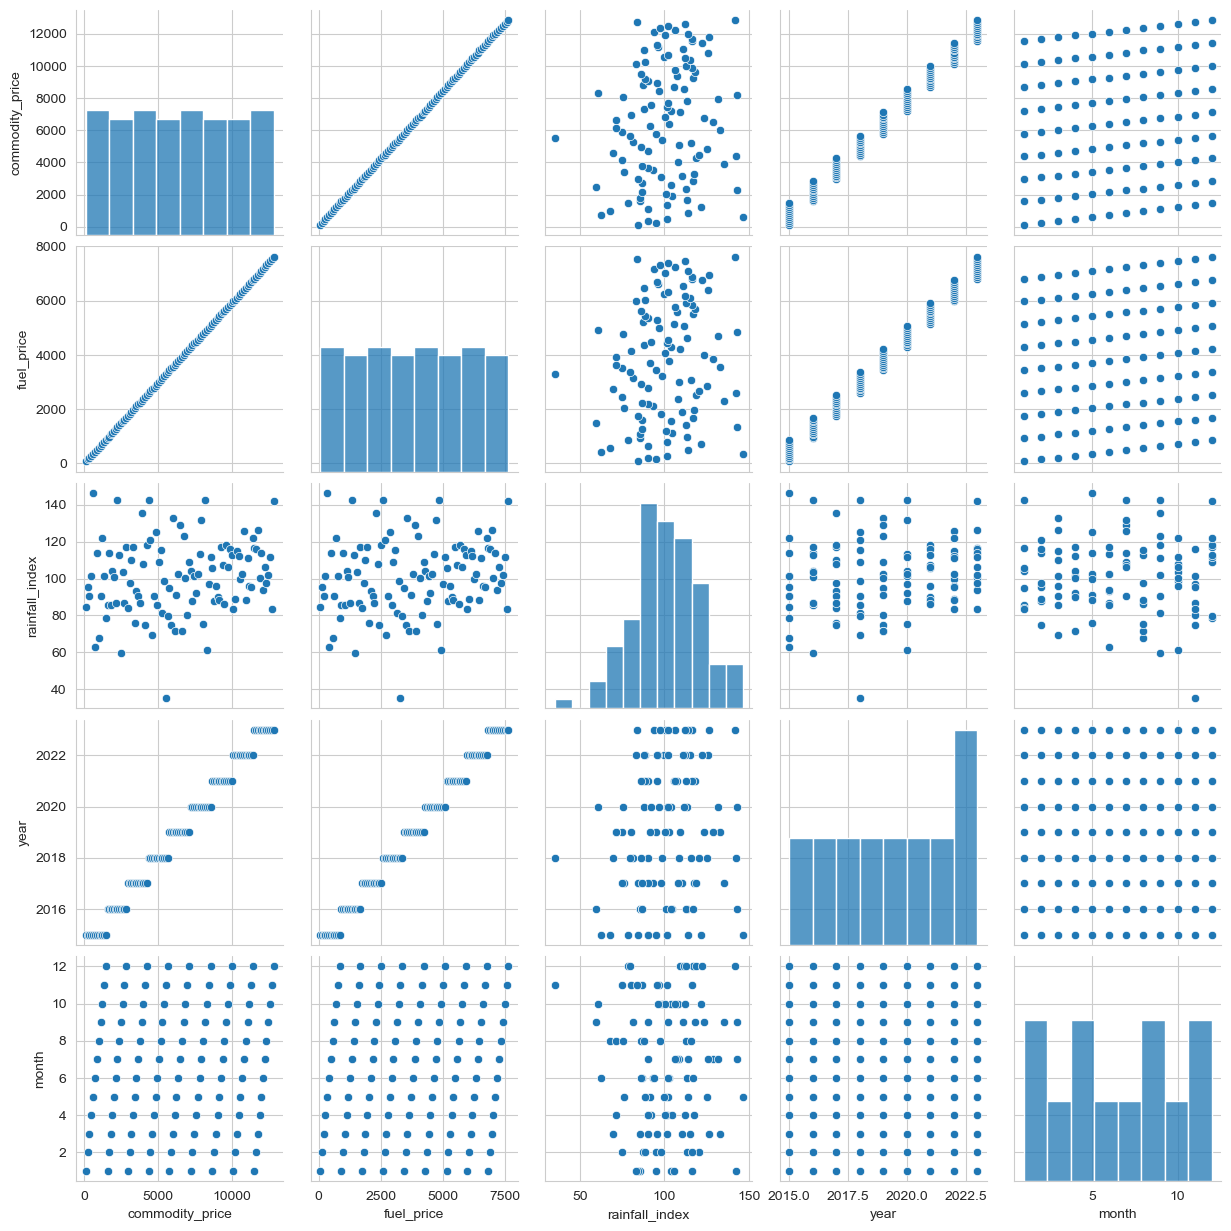

In [11]:
sns.pairplot(numeric_df)
plt.show()


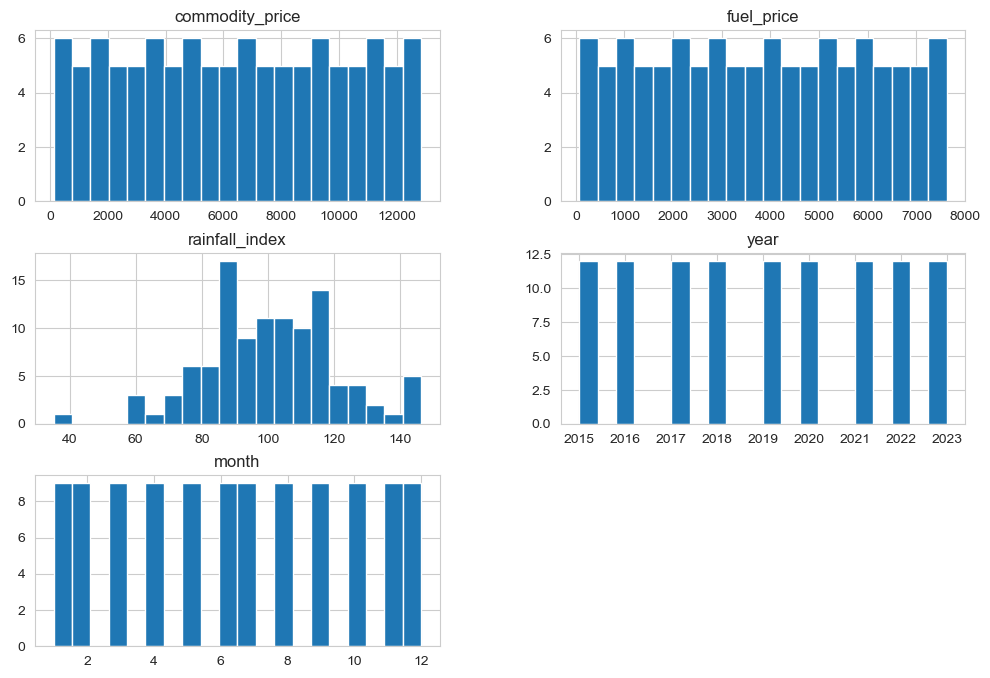

In [12]:
numeric_df.hist(bins=20, figsize=(12,8))
plt.show()


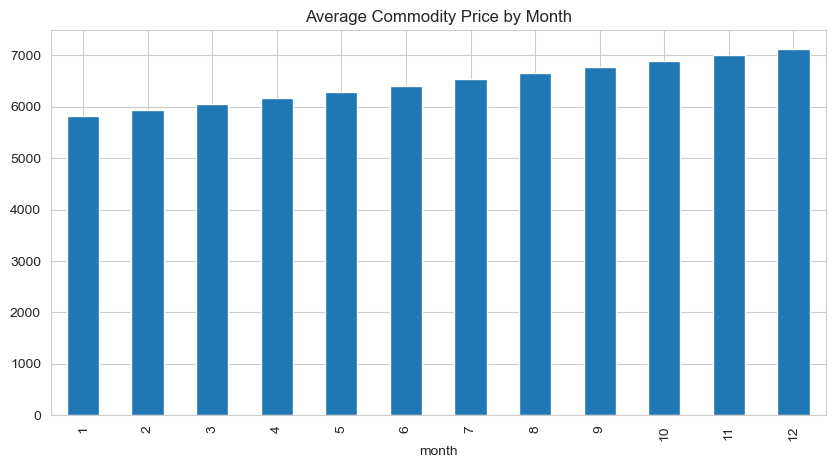

In [13]:
monthly_avg = df.groupby("month")["commodity_price"].mean()

monthly_avg.plot(kind="bar")
plt.title("Average Commodity Price by Month")
plt.show()


In [14]:
RESULTS_DIR = PROJECT_ROOT / "results"
RESULTS_DIR.mkdir(exist_ok=True)

corr_matrix.to_csv(RESULTS_DIR / "correlation_matrix.csv")

print("EDA snapshot saved.")


EDA snapshot saved.
